<a href="https://colab.research.google.com/github/00kang/gis_deep_learning/blob/main/July/07_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **단순 신경망 구현**

**전체구조**

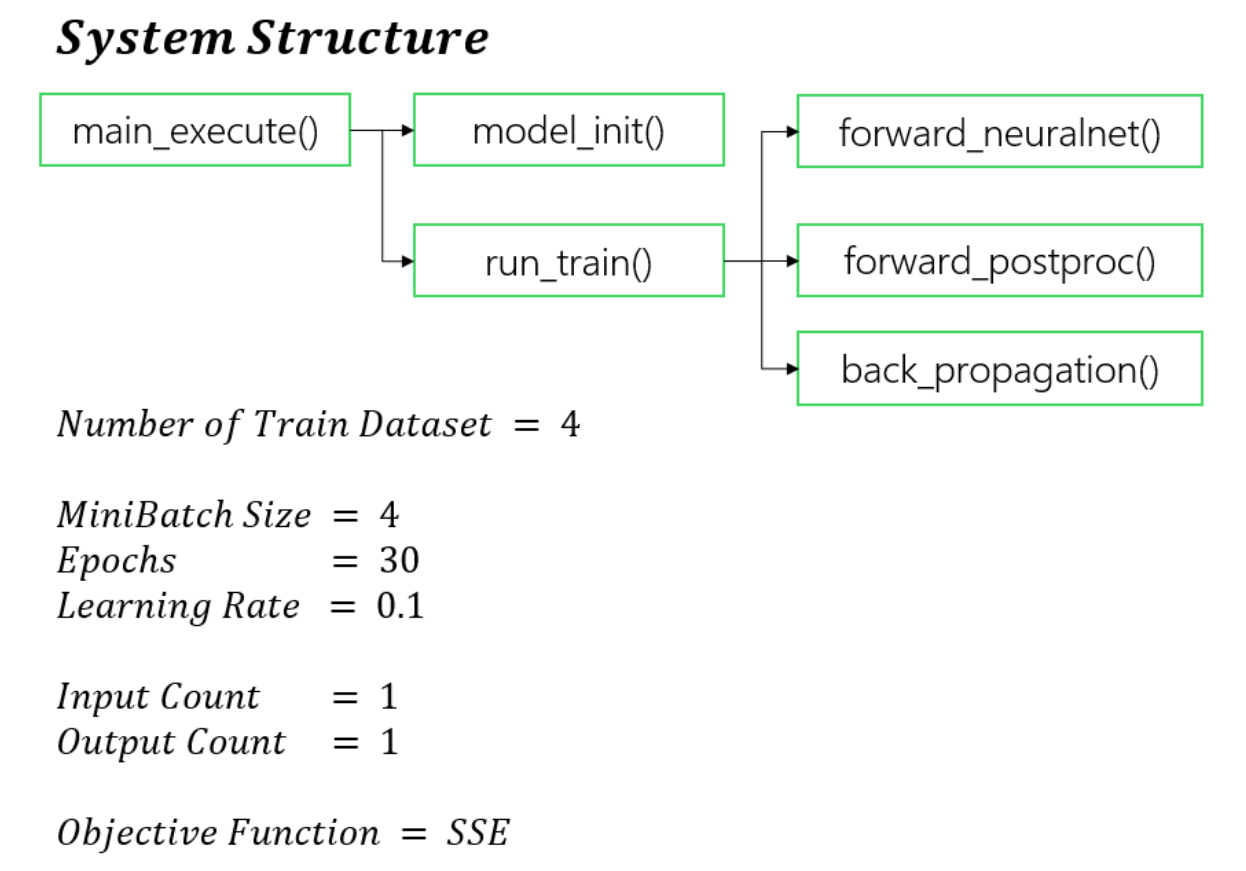

**결과값, 예측값**

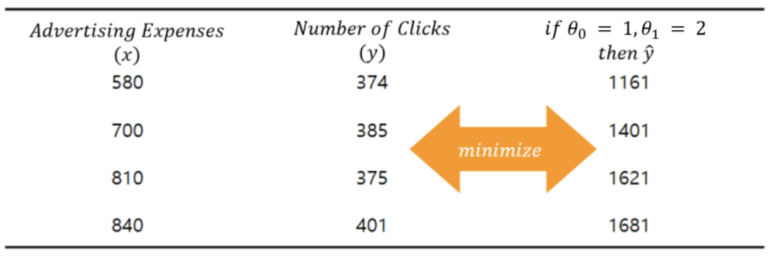

**코드**

In [1]:
import numpy as np

x = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

RND_MEAN   = 0
RND_STD    = 1
input_cnt  = 1 #독립변수 x의 개수
output_cnt = 1 #종속변수 y의 개수

#input data, output data, 학습 수, 학습조회, 학습률
def main_execute(x, y, epoch_count, report, lr = 0.001):
    model_init()
    theta_0, theta_1, sse_row = run_train(x,y, epoch_count, report, lr)
    return theta_0, theta_1, sse_row

#main_execute() 하위함수 _ 세타 초기화 함수
def model_init():
    global theta_0, theta_1
    #0과 1 사이 랜덤값 추출
    theta_0 = np.random.normal(RND_MEAN, RND_STD, [output_cnt])
    theta_1 = np.random.normal(RND_MEAN, RND_STD, [input_cnt, output_cnt])
    
#run_train() 하위함수 _ y값 예측 함수
def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x
    return y_hat

#run_train() 하위함수 _ SSE(오차제곱합) 계산 함수
def forward_postproc(output, y):
    diff   = output-y
    square = np.square(diff)
    sse    = 1/2*(np.sum(square))
    return sse 

#run_train() 하위함수 _ 세타 갱신 함수
def back_propagation(y_hat, lr):
    global theta_0, theta_1
    theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr * (np.sum((y_hat - y_label_total) * x))

#main_execute() 하위함수 _ 학습수행함수
def run_train(x, y, epoch_count, report, lr):
    sse_row = []
    print("Initial theta_0 : {}".format(theta_0))
    print("Initial theta_1 : {}".format(theta_1))
   
    theta_0_row = []
    theta_1_row = []

    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)    
        sse   = forward_postproc(y_hat,y_label_total)
        
        sse_row.append(sse)
        back_propagation(y_hat, lr)
        
        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)
        
        if report > 0 and (epoch) % report == 0:
            print("Epoch - {}".format(epoch+1))
            print("SSE : {}".format(sse))
    print("==========================")
    print("Final SSE : {}".format(sse))
    return theta_0_row, theta_1_row, sse_row

## **lr = 0.01** 

**실행 결과** 

In [5]:
theta_0, theta_1, sse_row = main_execute(x, y_label_total, 
                                         epoch_count = 30, report = 4, lr=0.01)

Initial theta_0 : [-2.0259985]
Initial theta_1 : [[-0.34371801]]
Epoch - 1
SSE : 816548.9507592221
Epoch - 5
SSE : 4.265075421244757e+40
Epoch - 9
SSE : 2.2403273808865576e+75
Epoch - 13
SSE : 1.1767826539595412e+110
Epoch - 17
SSE : 6.1813171881694065e+144
Epoch - 21
SSE : 3.24687673226633e+179
Epoch - 25
SSE : 1.7054954783277434e+214
Epoch - 29
SSE : 8.958500942430565e+248
Final SSE : 4.2887579544522444e+257


In [6]:
sse_row

[816548.9507592221,
 388721119549389.8,
 1.860948393291254e+23,
 8.909032075613741e+31,
 4.265075421244757e+40,
 2.0418456454656993e+49,
 9.775052556258146e+57,
 4.6796707033070445e+66,
 2.2403273808865576e+75,
 1.0725256309173903e+84,
 5.134567558244715e+92,
 2.458102934810863e+101,
 1.1767826539595412e+110,
 5.633683581955512e+118,
 2.6970478018863002e+127,
 1.2911741917771709e+136,
 6.1813171881694065e+144,
 2.9592197880107983e+153,
 1.4166853903751946e+162,
 6.782184626616162e+170,
 3.24687673226633e+179,
 1.554397158868308e+188,
 7.441460599618721e+196,
 3.562495951549108e+205,
 1.7054954783277434e+214,
 8.164822826904708e+222,
 3.9087955753544026e+231,
 1.8712816155133055e+240,
 8.958500942430565e+248,
 4.2887579544522444e+257]

**시각화**

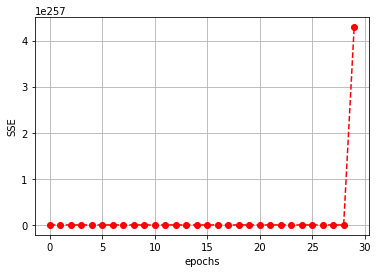

In [7]:
import matplotlib.pyplot as plt
plt.plot(sse_row, '--o', color = 'red')

plt.xlabel('epochs')
plt.ylabel('SSE')
plt.grid()
plt.show()

## **lr = 0.0000001** 

In [8]:
theta_0, theta_1, sse_row = main_execute(x, y_label_total, 
                                         epoch_count = 30, report = 4, lr=0.0000001)

Initial theta_0 : [0.67713315]
Initial theta_1 : [[-2.3989176]]
Epoch - 1
SSE : 9288614.787507052
Epoch - 5
SSE : 1292137.6220113812
Epoch - 9
SSE : 183089.5821377199
Epoch - 13
SSE : 29273.403979176124
Epoch - 17
SSE : 7940.318276893857
Epoch - 21
SSE : 4981.588048119546
Epoch - 25
SSE : 4571.23537309455
Epoch - 29
SSE : 4514.322478083443
Final SSE : 4510.750670472735


In [9]:
sse_row

[9288614.787507052,
 5670199.934561862,
 3462036.2066923263,
 2114488.3860916775,
 1292137.6220113812,
 790292.1447238652,
 484037.3273359088,
 297143.11901234835,
 183089.5821377199,
 113487.58969404126,
 71012.47242863478,
 45091.726138586484,
 29273.403979176124,
 19620.15891434185,
 13729.19655419012,
 10134.194314700384,
 7940.318276893857,
 6601.48959612817,
 5784.4597239952855,
 5285.861333403869,
 4981.588048119546,
 4795.903058093645,
 4682.5874294535215,
 4613.435724883411,
 4571.23537309455,
 4545.482278473959,
 4529.766241011675,
 4520.17538997826,
 4514.322478083443,
 4510.750670472735]

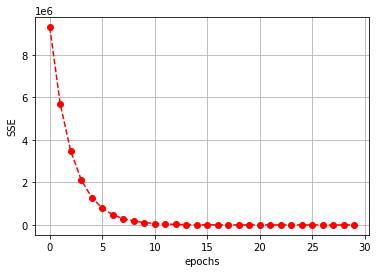

In [10]:
import matplotlib.pyplot as plt
plt.plot(sse_row, '--o', color = 'red')

plt.xlabel('epochs')
plt.ylabel('SSE')
plt.grid()
plt.show()